In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [20]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
CLASSES = 7
LR = 1e-3
EPOCHS = 4

In [4]:
train_dataset = tf.keras.utils.image_dataset_from_directory('dataset/train',
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True,
                                                            seed=42)

val_dataset = tf.keras.utils.image_dataset_from_directory('dataset/val',
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE,
                                                          shuffle=False,
                                                          seed=42)

test_dataset = tf.keras.utils.image_dataset_from_directory('dataset/test',
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMG_SIZE,
                                                           shuffle=False,
                                                           seed=42)

class_names = train_dataset.class_names
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE).cache()
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE).cache()

Found 13059 files belonging to 7 classes.
Metal device set to: Apple M1
Found 1619 files belonging to 7 classes.
Found 1618 files belonging to 7 classes.


2022-09-01 10:26:36.144098: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-01 10:26:36.144695: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(*IMG_SIZE, 3),
                                                    include_top=False,
                                                    weights='imagenet')

In [6]:
base_model.trainable = False
base_model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

In [7]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(CLASSES)

In [8]:
inputs = tf.keras.Input(shape=(*IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 1, 1, 1024)       1529968   
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 7)                 7175      
                                                                 
Total params: 1,537,143
Trainable params: 7,175
Non-trainable

In [11]:
history = model.fit(train_dataset,
                    epochs=4,
                    validation_data=val_dataset)

Epoch 1/4


2022-09-01 10:26:54.558818: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-01 10:26:54.559515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 23/409 [>.............................] - ETA: 38s - loss: 1.8397 - accuracy: 0.3003

2022-09-01 10:26:58.356334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: inconsistent chromaticities


124/409 [========>.....................] - ETA: 30s - loss: 1.2007 - accuracy: 0.5721

2022-09-01 10:27:09.366837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


162/409 [==========>...................] - ETA: 26s - loss: 1.1194 - accuracy: 0.6047

2022-09-01 10:27:13.712620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


173/409 [===========>..................] - ETA: 25s - loss: 1.0983 - accuracy: 0.6129

2022-09-01 10:27:14.886144: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


229/409 [===============>..............] - ETA: 20s - loss: 1.0075 - accuracy: 0.6486

2022-09-01 10:27:22.192318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 1000000h: invalid rendering intent


278/409 [===================>..........] - ETA: 15s - loss: 0.9511 - accuracy: 0.6722

2022-09-01 10:27:28.647599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data


288/409 [====================>.........] - ETA: 14s - loss: 0.9415 - accuracy: 0.6760

2022-09-01 10:27:29.789620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-01 10:27:29.789645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


307/409 [=====================>........] - ETA: 12s - loss: 0.9246 - accuracy: 0.6817

2022-09-01 10:27:32.876420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


371/409 [==========================>...] - ETA: 4s - loss: 0.8761 - accuracy: 0.6981

2022-09-01 10:27:40.496530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-01 10:27:40.529410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


376/409 [==========================>...] - ETA: 3s - loss: 0.8718 - accuracy: 0.7000

2022-09-01 10:27:41.314017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


380/409 [==========================>...] - ETA: 3s - loss: 0.8709 - accuracy: 0.7006

2022-09-01 10:27:41.775929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


409/409 [==============================] - ETA: 0s - loss: 0.8504 - accuracy: 0.7092

2022-09-01 10:27:45.748538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-09-01 10:27:46.639336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2022-09-01 10:27:48.274512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


409/409 [==============================] - 58s 136ms/step - loss: 0.8504 - accuracy: 0.7092 - val_loss: 0.5626 - val_accuracy: 0.8159
Epoch 2/4
409/409 [==============================] - 43s 104ms/step - loss: 0.5144 - accuracy: 0.8314 - val_loss: 0.5040 - val_accuracy: 0.8320
Epoch 3/4
409/409 [==============================] - 44s 107ms/step - loss: 0.4408 - accuracy: 0.8570 - val_loss: 0.4863 - val_accuracy: 0.8369
Epoch 4/4
409/409 [==============================] - 42s 103ms/step - loss: 0.3986 - accuracy: 0.8728 - val_loss: 0.4810 - val_accuracy: 0.8413


In [12]:
model.evaluate(test_dataset)

15/51 [=======>......................] - ETA: 3s - loss: 0.3916 - accuracy: 0.8521

2022-09-01 10:30:23.700870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-01 10:30:23.700886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


47/51 [==========================>...] - ETA: 0s - loss: 0.5145 - accuracy: 0.8225

2022-09-01 10:30:27.128324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/51 [==============================] - 6s 108ms/step - loss: 0.5062 - accuracy: 0.8257


[0.5061922073364258, 0.8257107734680176]

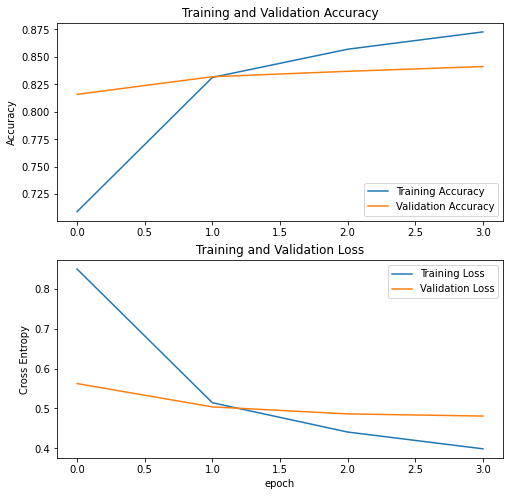

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [15]:
loss, accuracy = model.evaluate(test_dataset) 
print('Test loss:', loss)
print('Test accuracy:', accuracy)

15/51 [=======>......................] - ETA: 3s - loss: 0.3916 - accuracy: 0.8521

2022-09-01 10:32:24.275041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-01 10:32:24.275062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


47/51 [==========================>...] - ETA: 0s - loss: 0.5145 - accuracy: 0.8225

2022-09-01 10:32:27.746730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/51 [==============================] - 6s 105ms/step - loss: 0.5062 - accuracy: 0.8257
Test loss: 0.5061922073364258
Test accuracy: 0.8257107734680176


In [ ]:
model.save('mobilenetv3small_transferlearning_acc8257.h5')

2022-09-01 10:32:57.428283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Predictions:
 [0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 5, 0, 0, 0, 2, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


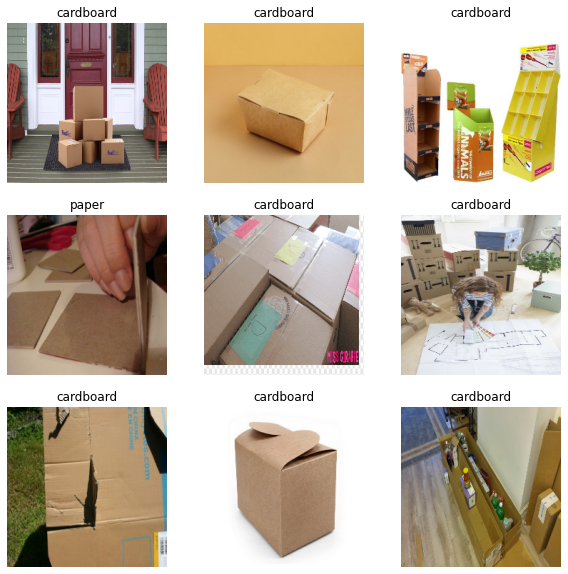

In [16]:
image_batch, label_batch = val_dataset.as_numpy_iterator().next()
predictions = []
for pred in model.predict_on_batch(image_batch):
    predictions.append(np.argmax(pred))

print('Predictions:\n', predictions)
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]])
    plt.axis("off")

In [17]:
base_model.trainable = True
print("Number of layers: ", len(base_model.layers))

fine_tune_at = 100
for layer in base_model.layers[:100]:
    layer.trainable = False

Number of layers:  235


In [18]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=LR/10),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 1, 1, 1024)       1529968   
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 7)                 7175      
                                                                 
Total params: 1,537,143
Trainable params: 1,411,559
Non-train

In [21]:
history_fine = model.fit(train_dataset,
                         epochs=2 * EPOCHS,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_dataset)

Epoch 4/8


2022-09-01 10:33:47.400929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


409/409 [==============================] - ETA: 0s - loss: 0.4063 - accuracy: 0.8625

2022-09-01 10:34:52.046098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


409/409 [==============================] - 72s 157ms/step - loss: 0.4063 - accuracy: 0.8625 - val_loss: 0.4307 - val_accuracy: 0.8666
Epoch 5/8
409/409 [==============================] - 62s 151ms/step - loss: 0.2072 - accuracy: 0.9361 - val_loss: 0.4376 - val_accuracy: 0.8697
Epoch 6/8
409/409 [==============================] - 64s 157ms/step - loss: 0.0931 - accuracy: 0.9756 - val_loss: 0.4730 - val_accuracy: 0.8709
Epoch 7/8
409/409 [==============================] - 65s 159ms/step - loss: 0.0345 - accuracy: 0.9918 - val_loss: 0.5969 - val_accuracy: 0.8666
Epoch 8/8
409/409 [==============================] - 64s 156ms/step - loss: 0.0164 - accuracy: 0.9958 - val_loss: 0.6176 - val_accuracy: 0.8691


In [22]:
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

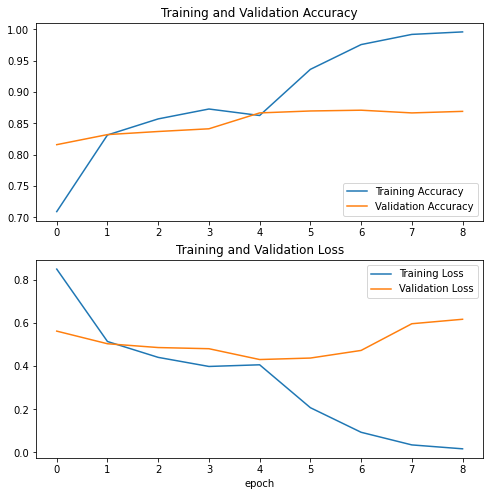

In [25]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [26]:
loss, accuracy = model.evaluate(test_dataset) 
print('Test loss:', loss)
print('Test accuracy:', accuracy)

15/51 [=======>......................] - ETA: 3s - loss: 0.5111 - accuracy: 0.8688

2022-09-01 10:40:07.160374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-09-01 10:40:07.160402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


47/51 [==========================>...] - ETA: 0s - loss: 0.6413 - accuracy: 0.8637

2022-09-01 10:40:10.595213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/51 [==============================] - 6s 115ms/step - loss: 0.6225 - accuracy: 0.8653
Test loss: 0.6225389838218689
Test accuracy: 0.8652657270431519


In [27]:
model.save('mobilenetv3small_acc8652.h5')

/Users/gautam/miniforge3/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [28]:
with open('classes.txt', 'w') as f:
    f.writelines([f"{c}\n" for c in class_names])

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 1, 1, 1024)       1529968   
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 7)                 7175      
                                                                 
Total params: 1,537,143
Trainable params: 1,411,559
Non-train